In [1]:
!pip install opencv-python

In [33]:
import os
import numpy as np
import pywt
import cv2
from skimage.feature import greycomatrix, greycoprops
import csv
import pandas as pd

In [32]:
import cv2

In [3]:
data_dir=os.path.expanduser('E:\\Brinjal_Chilly_Ladies')
files = []
labels=[]
# r=root, d=directories, f = files
for r, d, f in os.walk(data_dir):
    for file in f:
        if '.png' in file:
            label=r.split('\\')[-1]
            labels.append(label)
            files.append(os.path.join(r,file))
            
for f in files:
    print(f)

E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (1).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (10).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (100).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (101).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (102).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (103).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (104).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (105).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (106).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (107).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (108).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (109).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (11).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (110).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (111).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (112).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (113).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (114).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (115).png
E:\Brinjal_Chilly_Ladies\Brinjal\Br

In [ ]:
with open('dmey_features.csv', "a+", newline="") as wr:
    writer = csv.writer(wr)
    i=0
    for f in files:
        label=f.split('\\')[-1]
        img=cv2.imread(f)
        coeffs2 = pywt.dwt2(img, 'dmey')
        LL, (LH, HL, HH) = coeffs2
        g=[]
        con=[]
        enr=[]
        dis=[]
        hom=[]
        g.append(greycomatrix(np.uint8(LL[:,:,0]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(LL[:,:,1]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(LL[:,:,2]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(LH[:,:,0]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(LH[:,:,1]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(LH[:,:,2]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HL[:,:,0]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HL[:,:,1]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HL[:,:,2]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HH[:,:,0]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HH[:,:,1]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HH[:,:,2]), [1], [0], levels=256,normed=True,symmetric=True))
        for t in range(0,len(g)):
            con.append(greycoprops(np.array(g[t]), 'contrast'))
            enr.append(greycoprops(np.array(g[t]), 'energy'))
            dis.append(greycoprops(np.array(g[t]), 'dissimilarity'))
            hom.append(greycoprops(np.array(g[t]), 'homogeneity'))
        con_features=np.reshape(np.array(con).ravel(),(1,len(np.array(con).ravel())))
        enr_features=np.reshape(np.array(enr).ravel(),(1,len(np.array(enr).ravel())))
        dis_features=np.reshape(np.array(dis).ravel(),(1,len(np.array(dis).ravel())))
        hom_features=np.reshape(np.array(hom).ravel(),(1,len(np.array(hom).ravel())))
        features=np.concatenate((con_features,enr_features,dis_features,hom_features),axis=1);
        ff=features[0].tolist()     
        writer.writerow(ff+[labels[i]])
        i+=1
    wr.close()

C:\Users\User\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\User\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\User\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\User\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\User\anaconda3\lib\site

In [221]:
features_db=pd.read_csv('bior1.5_features.csv',header=None)
features_db.tail()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
445,898.679088,915.302139,915.302139,19560.357635,20058.922455,20058.991284,0.0,6.397863,731.888945,0.0,...,0.516419,0.511154,0.511149,1.0,0.691927,0.689904,1.0,0.949546,0.947742,Ladies_finger
446,483.165954,478.644462,478.644462,9472.011124,9039.758856,9039.390222,0.0,21.050245,385.959106,0.0,...,0.757449,0.772231,0.772112,1.0,0.828535,0.827231,1.0,0.977580,0.976672,Ladies_finger
447,440.061031,400.967204,400.967204,11017.483686,11457.023676,11456.972293,0.0,8.879630,373.140364,0.0,...,0.723093,0.718319,0.718309,1.0,0.831284,0.830086,1.0,0.975055,0.974189,Ladies_finger
448,615.139912,614.806894,614.806894,9755.230457,9381.343626,9381.118681,0.0,3.245533,473.295811,0.0,...,0.741281,0.755994,0.755917,1.0,0.815284,0.813810,1.0,0.970450,0.970389,Ladies_finger
449,664.463530,662.069152,662.069152,8292.678468,6910.624410,6910.420545,0.0,19.723441,514.232233,0.0,...,0.777980,0.811577,0.811494,1.0,0.815591,0.813747,1.0,0.973028,0.972540,Ladies_finger


In [222]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(features_db[48]))}   # 12-->48
class_mapping

{'Brinjal': 0, 'Chilly': 1, 'Ladies_finger': 2}

In [223]:
features_db[48] = features_db[48].map(class_mapping)  # 12-->48

In [224]:
features_db.tail()


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
445,898.679088,915.302139,915.302139,19560.357635,20058.922455,20058.991284,0.0,6.397863,731.888945,0.0,...,0.516419,0.511154,0.511149,1.0,0.691927,0.689904,1.0,0.949546,0.947742,2
446,483.165954,478.644462,478.644462,9472.011124,9039.758856,9039.390222,0.0,21.050245,385.959106,0.0,...,0.757449,0.772231,0.772112,1.0,0.828535,0.827231,1.0,0.977580,0.976672,2
447,440.061031,400.967204,400.967204,11017.483686,11457.023676,11456.972293,0.0,8.879630,373.140364,0.0,...,0.723093,0.718319,0.718309,1.0,0.831284,0.830086,1.0,0.975055,0.974189,2
448,615.139912,614.806894,614.806894,9755.230457,9381.343626,9381.118681,0.0,3.245533,473.295811,0.0,...,0.741281,0.755994,0.755917,1.0,0.815284,0.813810,1.0,0.970450,0.970389,2
449,664.463530,662.069152,662.069152,8292.678468,6910.624410,6910.420545,0.0,19.723441,514.232233,0.0,...,0.777980,0.811577,0.811494,1.0,0.815591,0.813747,1.0,0.973028,0.972540,2


In [225]:
X,Y = features_db.loc[:,0:48],features_db.loc[:,48]    #12-->48

In [226]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
print(Version(sklearn_version))    
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)

1.0.2


C:\Users\User\AppData\Local\Temp\ipykernel_6816\2163967750.py:3: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
C:\Users\User\AppData\Local\Temp\ipykernel_6816\2163967750.py:7: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


In [227]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [228]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  
X_train_std = pca.fit_transform(X_train_std)  
X_test_std = pca.transform(X_test_std) 
X_train_std.shape

(315, 10)

In [229]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
ppn = Perceptron(eta0=0.01, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

In [230]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


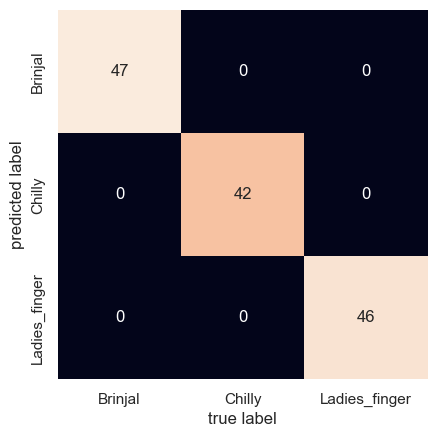

In [231]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [232]:
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


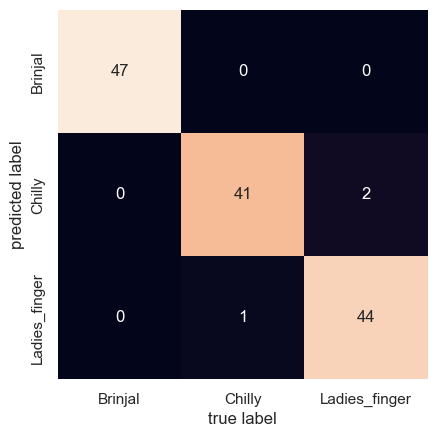

In [233]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [234]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)   # got this warning when max_iter=5 --->  ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
                                                              #warnings.warn(
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.99


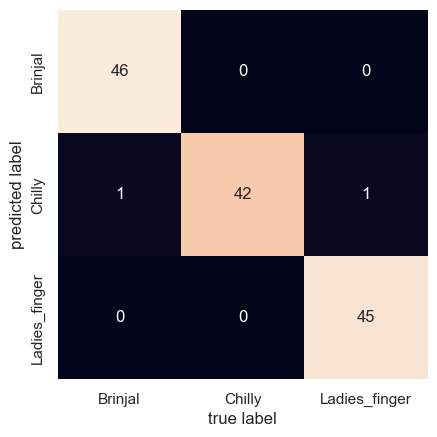

In [235]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [236]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.94


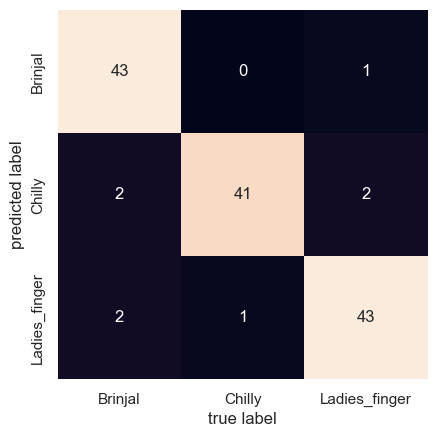

In [237]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [238]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


Accuracy: 1.00


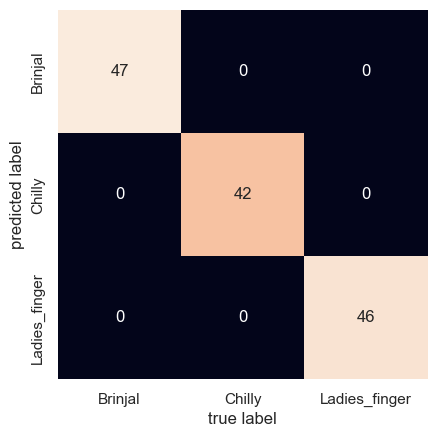

In [239]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [240]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=1)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.99


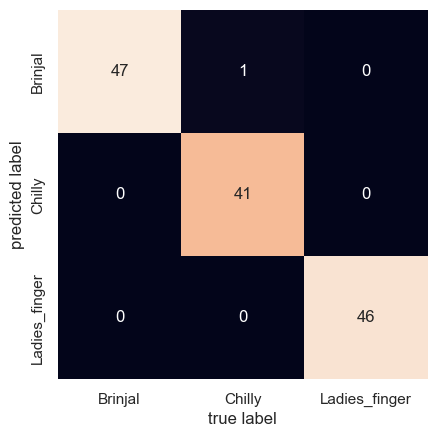

In [241]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [242]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 2), random_state=1)
clf1.fit(X_train_std, y_train)
y_pred = clf1.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.99


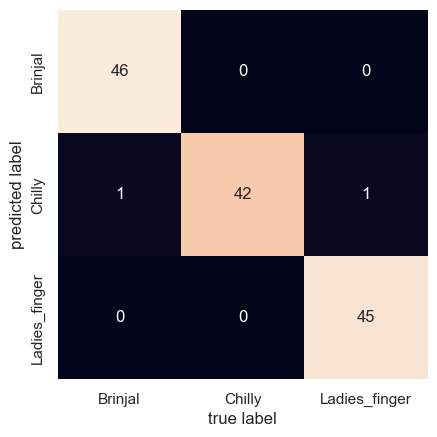

In [243]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [244]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=1)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.84


C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [245]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_std, y_train);
y_pred = model.predict(X_test_std)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.95


In [246]:
print(accuracy_score(y_pred,y_test))
#print(classification_report(y_pred,y_test))

0.9481481481481482


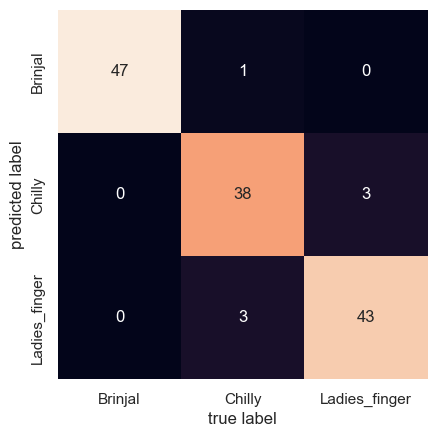

In [247]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel('true label')
plt.ylabel('predicted label');

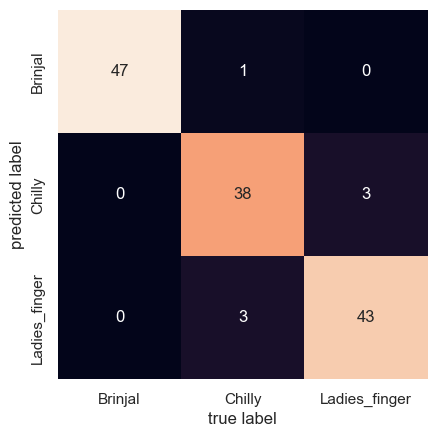

In [248]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [249]:
# Save the model
#from sklearn.externals import joblib
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [250]:
# Deserialization of the saved model
model1 = joblib.load('model.pkl')

In [251]:
# Predicting the custom image
img=cv2.imread('E:\Brinjal_Chilly_Ladies\\img.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sc = StandardScaler()
sc.fit(img)
img= sc.transform(img)
pca = PCA(n_components=10)  
img= pca.fit_transform(img)  
#img = pca.transform(img)
result=clf1.predict(img)
print(result)
print(np.unique(result, return_counts=True))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1
 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
(array([0, 1, 2], dtype=int64), array([32, 85, 34], dtype=int64))


In [252]:
# Predicting the custom image
_, veg=np.unique(result, return_counts=True)
position=np.argmax(veg)
print(np.argmax(veg))
print(class_mapping)


1
{'Brinjal': 0, 'Chilly': 1, 'Ladies_finger': 2}


In [253]:
# Predicting the custom image
output_class=list(class_mapping.keys())[list(class_mapping.values()).index(position)]
print("The predicted class is", output_class)

The predicted class is Chilly


In [254]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train_std, y_train);
y_pred = model.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.99


In [255]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      0.98      0.99        43
           2       0.98      1.00      0.99        45

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135



In [256]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_std, y_train);
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.97


In [257]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       0.98      0.93      0.95        44
           2       0.96      0.98      0.97        45

    accuracy                           0.97       135
   macro avg       0.97      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135

